## a) Set de 10 valores dados por el catedrático
Los siguientes son los 10 valores base para el ejercicio:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

# (a) Set de 10 valores
data = np.array([8, 8, 5, 9, 8, 10, 8, 7, 10, 1], dtype=float)

print("Valores (a):", data.tolist())
print("Media original:", data.mean())


Valores (a): [8.0, 8.0, 5.0, 9.0, 8.0, 10.0, 8.0, 7.0, 10.0, 1.0]
Media original: 7.4


## b) Set de 10 valores de probabilidad dados por el catedrático
Las probabilidades asociadas (para usar con Transformada Inversa) son:

In [5]:
# (b) Probabilidades (puede haber pequeño redondeo; se normaliza)
p = np.array([0.4, 0.17, 0.01, 0.04, 0.08, 0.01, 0.04, 0.02, 0.01, 0.21999999999999986], dtype=float)
p = p / p.sum()  # normalizar por si hay mínimos errores de redondeo

print("Probabilidades (b):", p.tolist())
print("Suma probabilidades:", p.sum())


Probabilidades (b): [0.4, 0.17, 0.01, 0.04, 0.08, 0.01, 0.04, 0.02, 0.01, 0.21999999999999986]
Suma probabilidades: 1.0


## c) Explicación del método de Bootstrapping
Bootstrapping es un método de remuestreo con reemplazo que genera muchas réplicas de la muestra original para aproximar la distribución de un estadístico (por ejemplo, la media). Cada réplica se obtiene seleccionando observaciones al azar (con reemplazo) de la muestra original usando un generador de aleatoriedad. Con estas réplicas se calculan medias, desviaciones y cuantiles para estimar incertidumbre (error estándar, intervalos de confianza) sin requerir supuestos fuertes de normalidad. En este examen, además, las selecciones se realizan mediante Transformada Inversa usando las probabilidades proporcionadas por el catedrático.

# d) Código de método de Bootstrapping
 d.i) Código de método de Transformada Inversa (discreta)



In [7]:
# Utilidades para transformada inversa discreta
cdf = np.cumsum(p)

def inv_transform_discrete(cdf, u):
    """
    Dada una CDF discreta (numpy array creciente) y u ~ U(0,1),
    retorna el índice i tal que CDF[i-1] < u <= CDF[i].
    """
    return int(np.searchsorted(cdf, u, side='left'))

# Centrar los datos a media 0 (opcional, útil para verificar sesgo en las medias bootstrap)
media_original = data.mean()
data_offset = data - media_original

B = 10_000      # réplicas bootstrap
N = len(data)   # tamaño de muestra por réplica

bootstrap_means = np.empty(B, dtype=float)

# Usamos U(0,1) de NumPy para este bloque
U = np.random.rand(B * N)
pos = 0
for b in range(B):
    idxs = [inv_transform_discrete(cdf, U[pos + i]) for i in range(N)]
    pos += N
    sample = data_offset[idxs]    # muestra centrada
    bootstrap_means[b] = sample.mean()

print("Resumen bootstrap (medias de datos centrados):")
print("  Media de las medias (≈ 0 por centrado):", bootstrap_means.mean())
print("  Desviación estándar (std) de las medias:", bootstrap_means.std(ddof=1))



Resumen bootstrap (medias de datos centrados):
  Media de las medias (≈ 0 por centrado): -0.9043900000000001
  Desviación estándar (std) de las medias: 0.9332367443377366


## d.ii) Histograma de resultados (medias bootstrap)

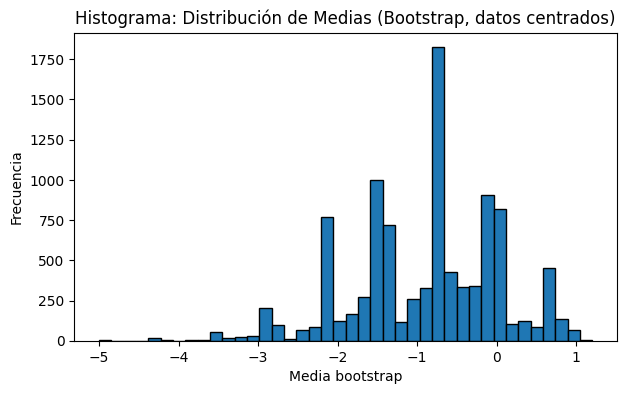

In [8]:
plt.figure(figsize=(7,4))
plt.hist(bootstrap_means, bins=40, edgecolor='black')
plt.title("Histograma: Distribución de Medias (Bootstrap, datos centrados)")
plt.xlabel("Media bootstrap")
plt.ylabel("Frecuencia")
plt.show()


## d.iii) Desviación estándar de la distribución de medias

In [9]:
std_bootstrap_means = bootstrap_means.std(ddof=1)
print("Desviación estándar de la distribución de medias (d.iii):", std_bootstrap_means)


Desviación estándar de la distribución de medias (d.iii): 0.9332367443377366


##e) Cálculo de probabilidades para cada rango de la distribución de medias
Se divide la distribución de medias en 5 rangos uniformes (mismo ancho) y se estima la probabilidad empírica en cada rango.xx

In [10]:
bins = 5
min_m, max_m = bootstrap_means.min(), bootstrap_means.max()
edges = np.linspace(min_m, max_m, bins + 1)   # 6 bordes => 5 rangos
counts, _ = np.histogram(bootstrap_means, bins=edges)
prob_bins = counts / counts.sum()
bin_centers = 0.5 * (edges[:-1] + edges[1:])

print("Rangos y probabilidades (e):")
for i in range(bins):
    a, b_ = edges[i], edges[i+1]
    print(f"  Bin {i+1}: [{a:.6f}, {b_:.6f}) -> P = {prob_bins[i]:.6f}")


Rangos y probabilidades (e):
  Bin 1: [-5.000000, -3.760000) -> P = 0.003200
  Bin 2: [-3.760000, -2.520000) -> P = 0.044300
  Bin 3: [-2.520000, -1.280000) -> P = 0.320300
  Bin 4: [-1.280000, -0.040000) -> P = 0.452800
  Bin 5: [-0.040000, 1.200000) -> P = 0.179400
